### Importing Required Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Non Linear Regression Example

In [3]:
import numpy as np
import pandas as pd
# downloading the data set
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
df = pd.read_csv("china_gdp.csv")
df.head(10)
df.tail(5)



2023-09-06 15:22:29 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


### Plotting the Dataset

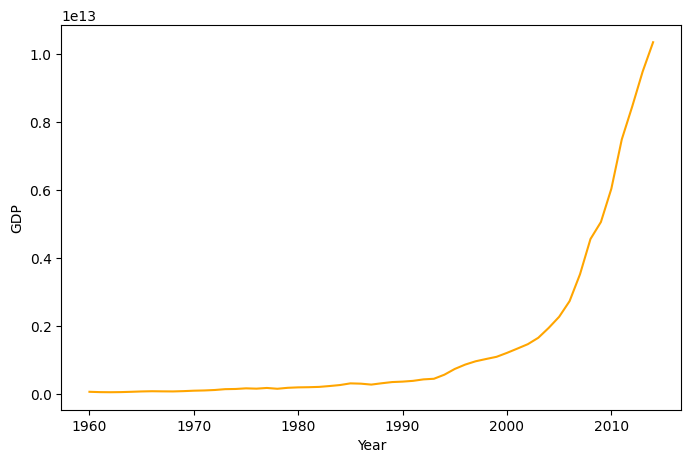

In [4]:
plt.figure(figsize=(8,5))
x_data = df["Year"].values
y_data = df["Value"].values
plt.xlabel("Year")
plt.ylabel("GDP")
plt.plot(x_data , y_data , color = 'orange')

# Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

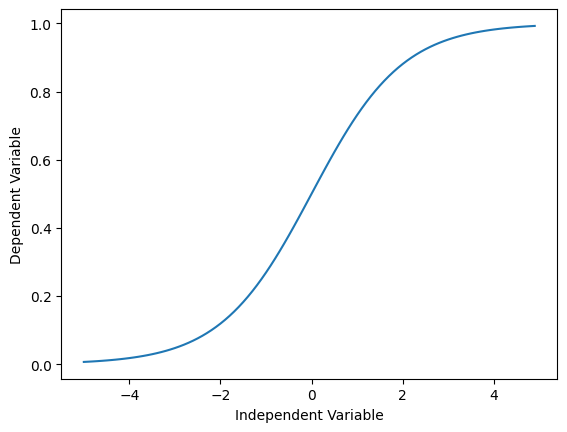

In [5]:
X = np.arange(-5,5,0.1 )
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Building The Model

In [6]:
def sigmoid(x, Beta_1 , Beta_2):
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
  return y


### Normalize the data

In [9]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)


### Finding the parameters for our function

In [12]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


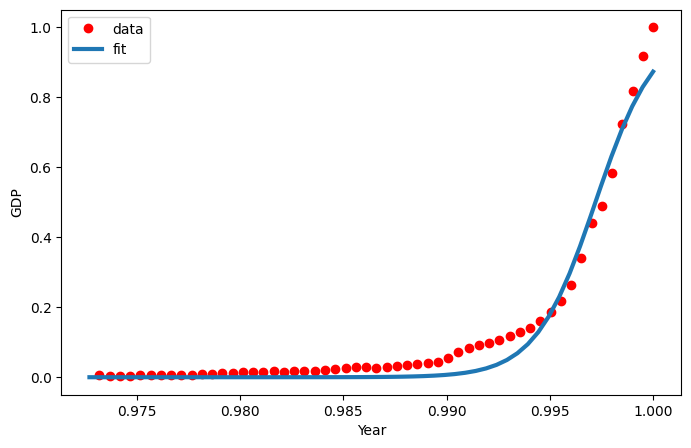

In [13]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()